<a href="https://colab.research.google.com/github/ekfdl2323/myroom/blob/main/1_VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!git clone https://github.com/ekfdl2323/myroom.git

fatal: destination path 'myroom' already exists and is not an empty directory.


In [35]:
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
from torchvision import models, transforms



print("Pytorch version: ", torch.__version__)
print("Torchvision Version: ", torchvision.__version__)

Pytorch version:  1.12.1+cu113
Torchvision Version:  0.13.1+cu113


In [36]:
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)
net.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [37]:
class BaseTransform():
    """
  Attributes
  __________
  resize: int
      크기 변경 전의 화상 크기
  mean: (R,G,B)
      각 색상 채널의 평균값
  std : (R,G,B)
      각 색상 채널의 표준편차
  """

    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose([
            transforms.Resize(resize),
            transforms.CenterCrop(resize),  
            transforms.ToTensor(),  
            transforms.Normalize(mean, std)
        ])

    def __call__(self, img):
        return self.base_transform(img)

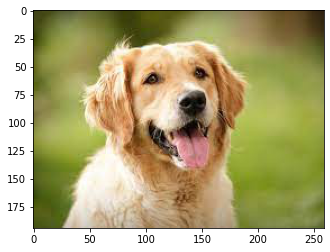

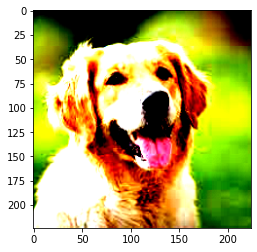

In [38]:
goldang = './drive/MyDrive/2학기 파일들/goldang.jpg'
img = Image.open(goldang)

plt.imshow(img)
plt.show()

resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)  # torch.Size([3, 224, 224])

img_transformed = img_transformed.numpy().transpose((1, 2, 0))
img_transformed = np.clip(img_transformed, 0, 1)
plt.imshow(img_transformed)
plt.show()

In [39]:
ILSVRC_class_index = json.load(open('./drive/MyDrive/2학기 파일들/imagenet_class_index.json', 'r'))
ILSVRC_class_index

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [40]:
class ILSVRCPredictor():
  

    def __init__(self, class_index):
        self.class_index = class_index

    def predict_max(self, out):
      
        maxid = np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(maxid)][1]

        return predicted_label_name

In [41]:
class ILSVRCPredictor():
    """
    ILSVRC 데이터 모델의 출력에서 라벨을 구한다.

    Attributes
    ----------
    class_index : dictionary
      클래스 index와 라벨명을 대응시킨 사전형 변수

    """

    def __init__(self, class_index):
        self.class_index = class_index

    def predict_max(self, out):
        """
        최대 확률의 ILSVRC 라벨명을 가져온다.

        Parameters
        ----------
        out: torch.Size([1, 1000])
          Net에서 출력

        Returns
        -------
        predicted_label_name : str
          가장 예측 확률이 높은 라벨명
        """
        maxid = np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(maxid)][1]

        return predicted_label_name


In [42]:
ILSVRC_class_index = json.load(open('./drive/MyDrive/2학기 파일들/imagenet_class_index.json', 'r'))

predictor = ILSVRCPredictor(ILSVRC_class_index)

image_file_path = ('./drive/MyDrive/2학기 파일들/goldang.jpg')
img = Image.open(image_file_path)

transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)
inputs = img_transformed.unsqueeze_(0)

out = net(inputs)
result = predictor.predict_max(out)

print("입력 화상 예측 결과: ", result)

입력 화상 예측 결과:  golden_retriever
